In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


# Pokemon EDA+Visualization+Analysis
**In this notebook, I tried analysis Pokemons with stats and create best team. Its my first data analysis so your feedback is highly appreciated and will help me to improve.**

**Content:**
1. [About Dataset](#1)
1. [EDA](#2)
1. [Type Analysis](#3)
    1. [Main Type Counts](#4)
    1. [Second Type Counts](#5)
    1. [Combinations Of Type1 And Type2](#6) 
    1. [TOP 10 Most Common Combination](#7)   
1. [Stat Analysis](#8)
    1. [Hist Table For Each Stat](#hist)
    1. [Stats Of Types And Finding Best Type](#9)
    1. [Stats Of Generations And Finding Best Generation](#10)
    1. [Best Pokemons by Stats](#11)
1. [Legendary Pokemons](#12)
    1. [Legendary vs Normal Pokemon stats](#13)
    1. [Legendary Pokemon counts by Generations](#14)
    1. [Legendary Pokemon counts by Types](#15)
    1. [Is There Type With No Legendary Pokemon?](#16)
1. #TODO:
Creating best team for every generation
    

<a id="1"></a> <br>
# 1. About Dataset 
This dataset contains about every Pokemon until generation 6 (2014-Pokemon X and Pokemon Y) <br> <br>
**Attribute Information**
* #: Pokedex Number of Pokemon
* Name: Names of Pokemon 
* Type 1: Main type of Pokemon.
* Type 2: Second type of Pokemon. 
* HP: Hit Points **stat** of Pokemon.
* Attack: Attack **stat** of Pokemon.
* Defense: Defense **stat** of Pokemon.
* Sp. Atk: Special Attack **stat** of Pokemon.
* Sp. Def: Special Defense **stat** of Pokemon.
* Speed: Speed **stat** of Pokemon.
* Total: Average of all other **stats**
* Generation: Pokemons first relese generation there is 6 generation.
  1. Red and Blue (1996–1999), 
  2. Gold and Silver (1999–2002), 
  3. Ruby and Sapphire (2002–2006), 
  4. Diamond and Pearl(2006–2010),
  5. Black And White (2010–2013),
  6. X and Y (2013–2016)
* Legendary: Bool about is pokemon legendary or not.


In [2]:
# Importing Required Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Reading And Copying Data
main_df = pd.read_csv('../input/pokemon/Pokemon.csv', encoding="windows-1252")
poke_df=main_df.copy()

poke_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<a id="2"></a> <br>
# 2. EDA

In [4]:
# Shape of the dataset
poke_df.shape

(800, 13)

In [5]:
# Getting list of all columns
poke_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
# Information about dataset
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# Statistical measurement of the dataset
poke_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
# Checking for any duplicated value 
poke_df.duplicated().sum()

0

In [9]:
# Checking for any missing value
poke_df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

There is 386 pokemon with only one main type

<a id="3"></a> <br>
# 3. Type Analysis
* main type counts
* second type counts
* combinations of type1 and type2
* top 10 most common combination

<a id="4"></a> <br>
### Main Type Counts


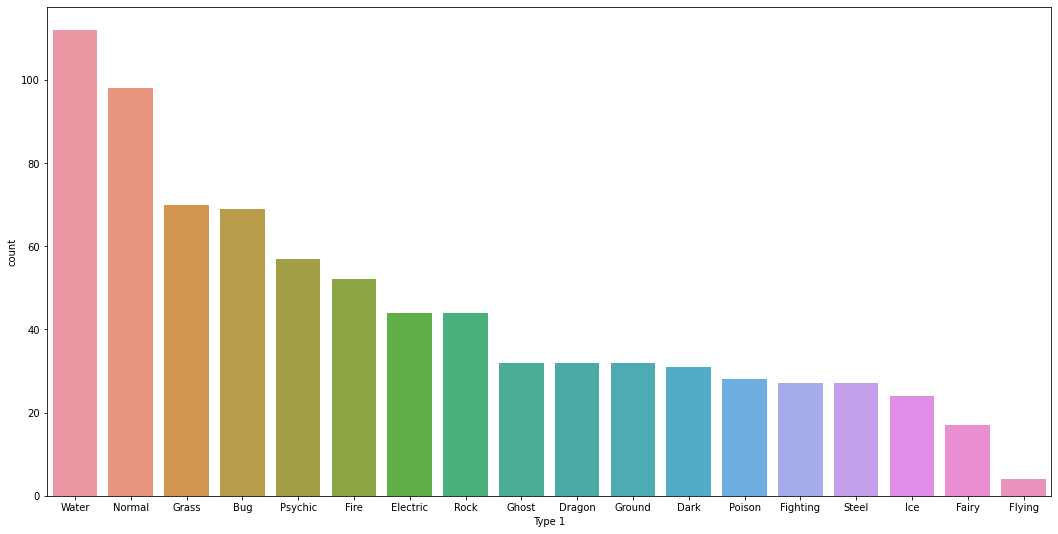

In [10]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='Type 1', data=poke_df,order = poke_df['Type 1'].value_counts().index)

<a id="5"></a> <br>
### Second Type Counts

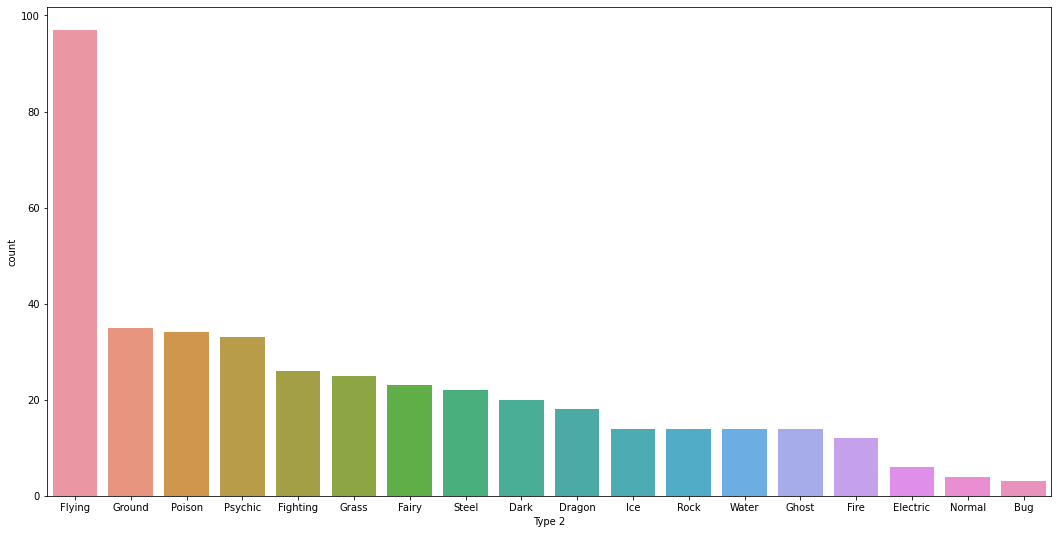

In [11]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='Type 2', data=poke_df, order = poke_df['Type 2'].value_counts().index)

<a id="6"></a> <br>
### How many combinations of Type 1 and Type 2 are there?

In [12]:
# Creating new column for df as "Type Combination"
poke_df['Type Combination'] = (poke_df['Type 1'] + "+" + poke_df['Type 2'])
poke_df['Type Combination'].nunique()


136

<a id="7"></a> <br>
### Top 10 Most Common Combinations


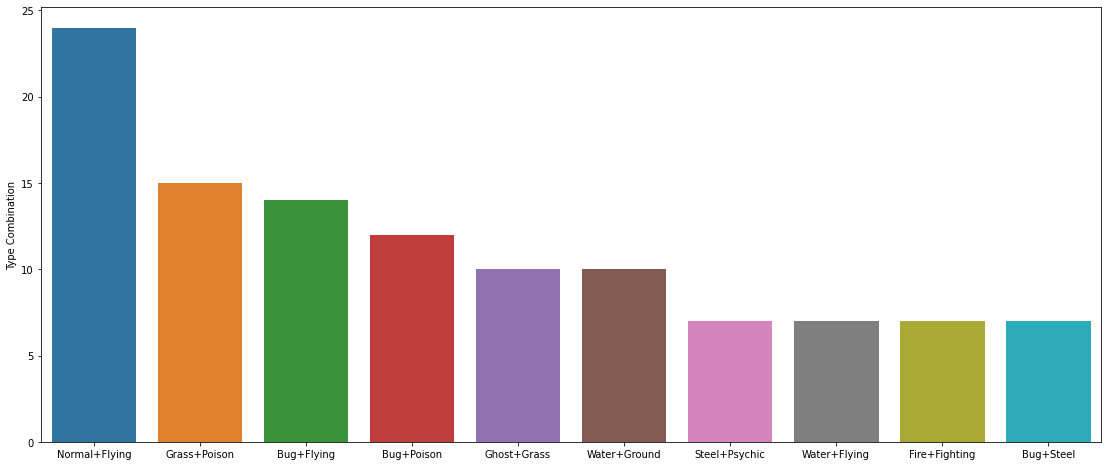

In [13]:
# visualize top 10 common combinations
fig, ax = plt.subplots(figsize=(19, 8))
top10 = poke_df['Type Combination'].value_counts()[0:10]
ax = sns.barplot(x=top10.index, y=top10)

<a id="8"></a> <br>
# 4. Stats
* Hist Table for each stat
* Stats of types and finding best type
* Stats of gens and finding best gen
* Best Pokemons for each stat and overall
There is 7 stats for every pokemon and I made a list for these stats for using in functions

There is 7 stats for every pokemon and I made a list for these stats for using in functions

In [14]:
# List of stats
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]

<a id="hist"></a> <br>
### Hist Table for each stat


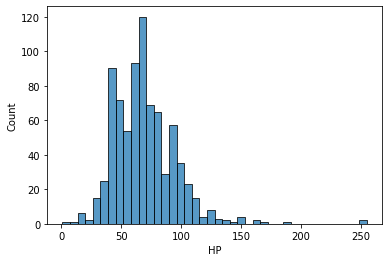

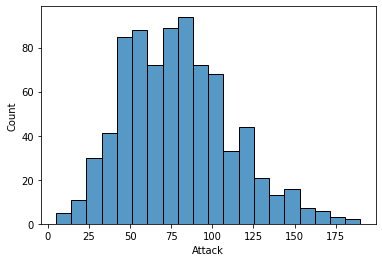

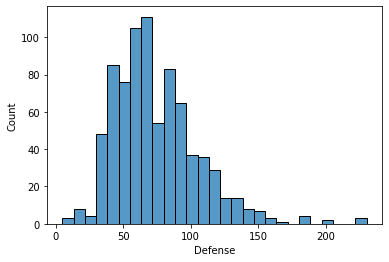

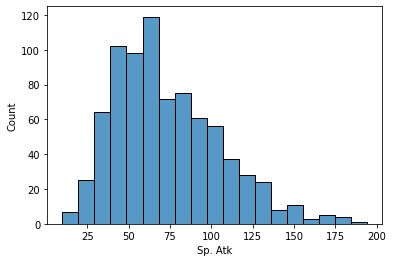

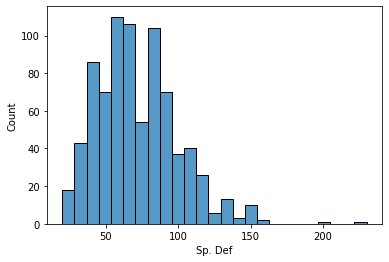

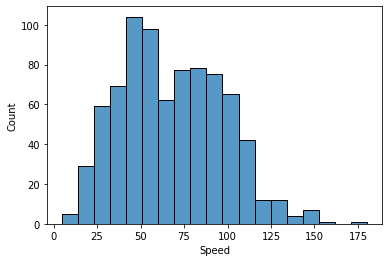

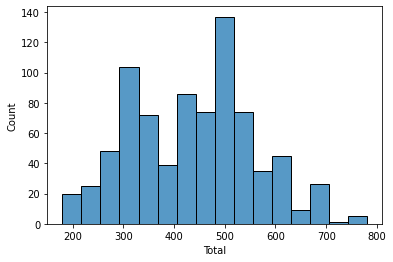

In [15]:
# Hist Table Function
def hist_plot(variable):
    var = variable
    fig, axs = plt.subplots()
    sns.histplot(data=poke_df[var])
    plt.show()

# Loop for stats List
for i in stats:
    hist_plot(i)

<a id="9"></a> <br>
### Stats of Types and Finding Best Type
and worse ^^

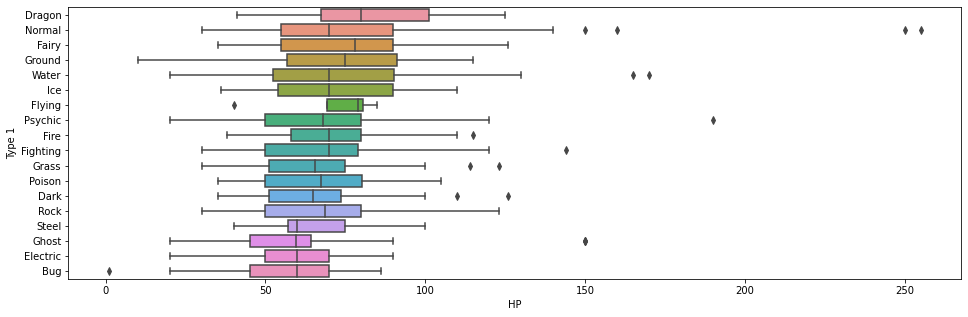

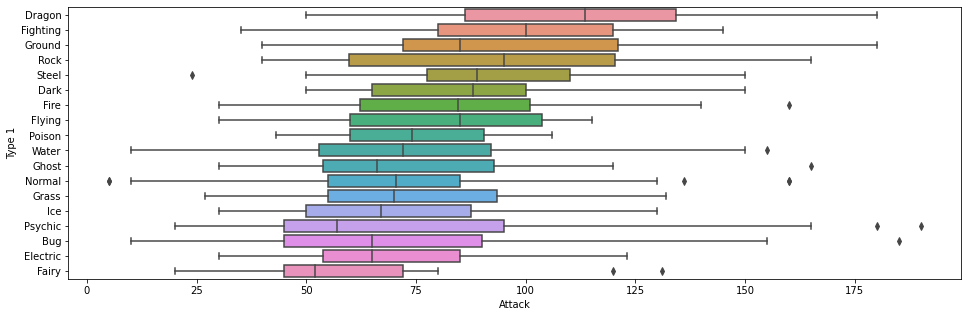

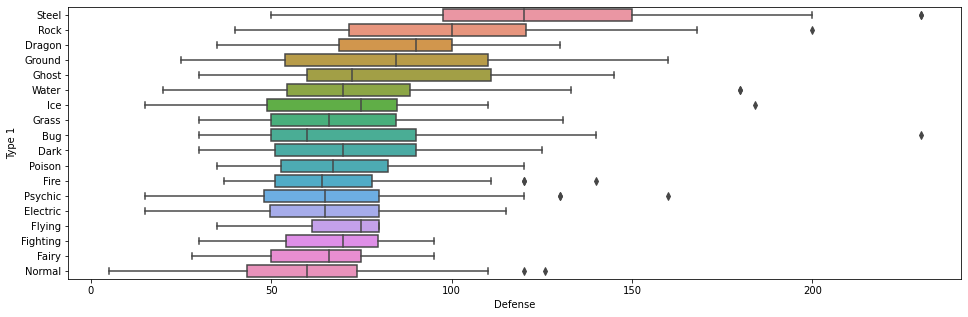

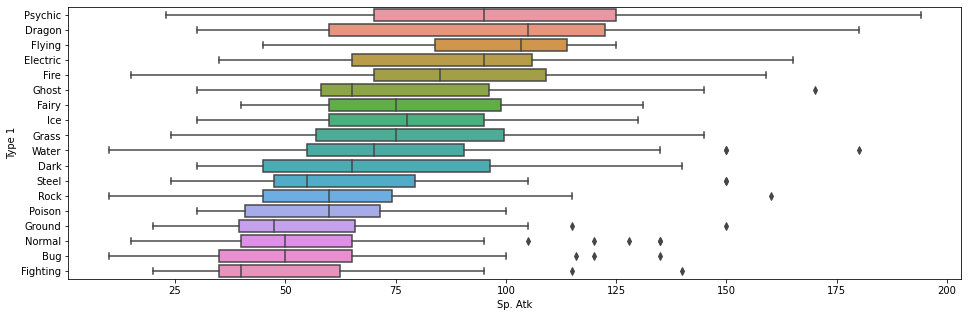

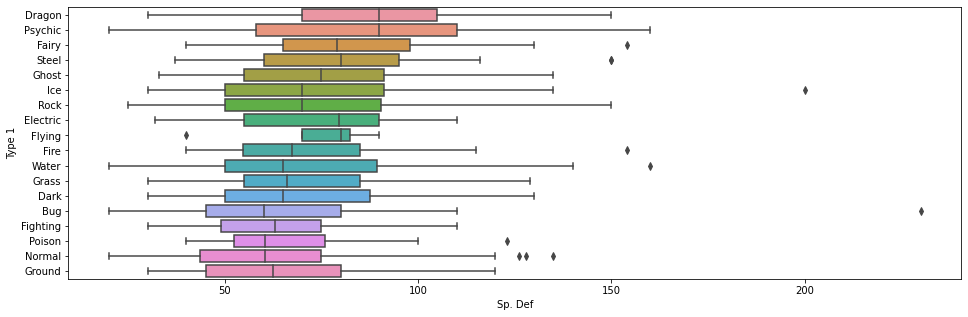

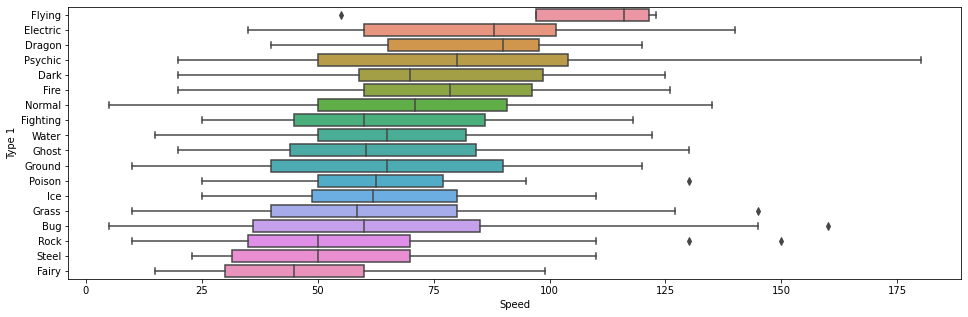

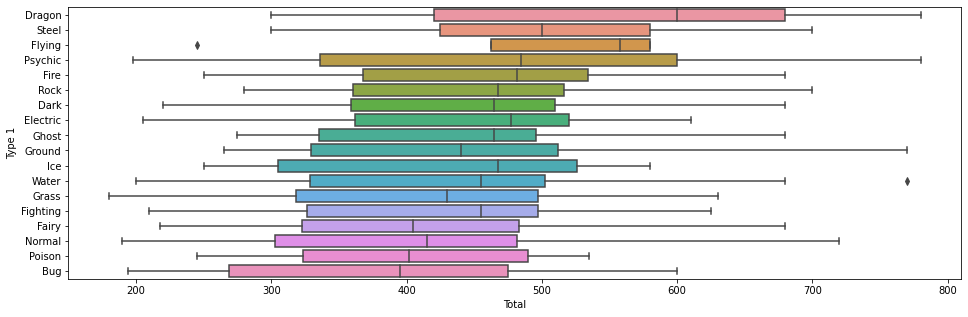

In [16]:
# Function for group, order and bar plot for types
def sort_and_bar_plot(value):
    index_group = poke_df.groupby(['Type 1']).mean()
    index_order = index_group[value].sort_values(ascending=False)
    fig, axs = plt.subplots(figsize=(16, 5))
    sns.boxplot(data=poke_df, x=value, y="Type 1", order=index_order.index)
    plt.show()

# Loop for every stat in stats list 
for i in stats:
    sort_and_bar_plot(i)

As we can see "Dragon" type is almost best in every stat and total stats

<a id="10"></a> <br>
### Stats of Generations And Finding Best Generation

<AxesSubplot:xlabel='Generation', ylabel='Total'>

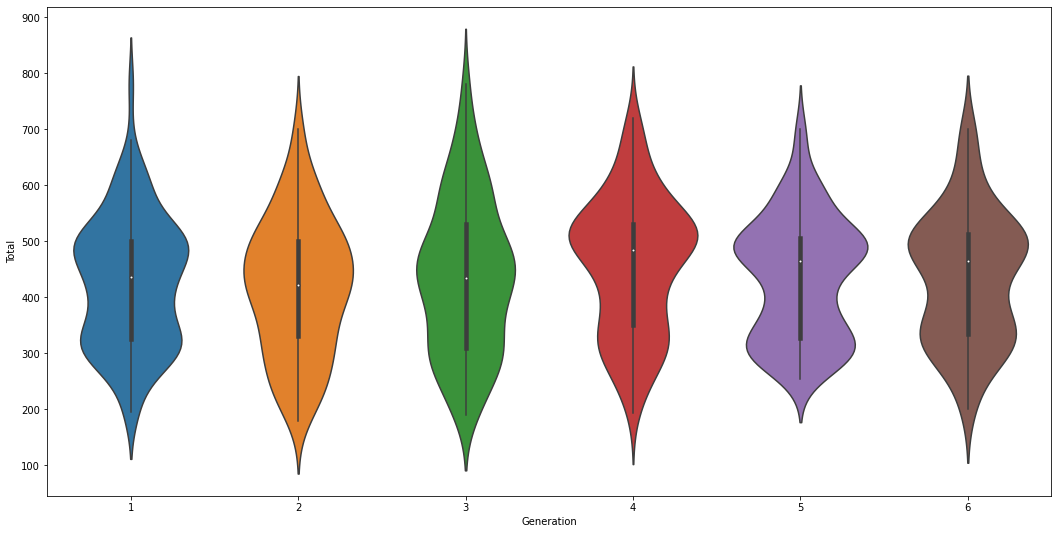

In [17]:
plt.subplots(figsize=(18, 9))
sns.violinplot(data=poke_df, x="Generation", y="Total")


While Gen 4 is better at mean gen 3 is better at min, max and %50 so we need to look deeply

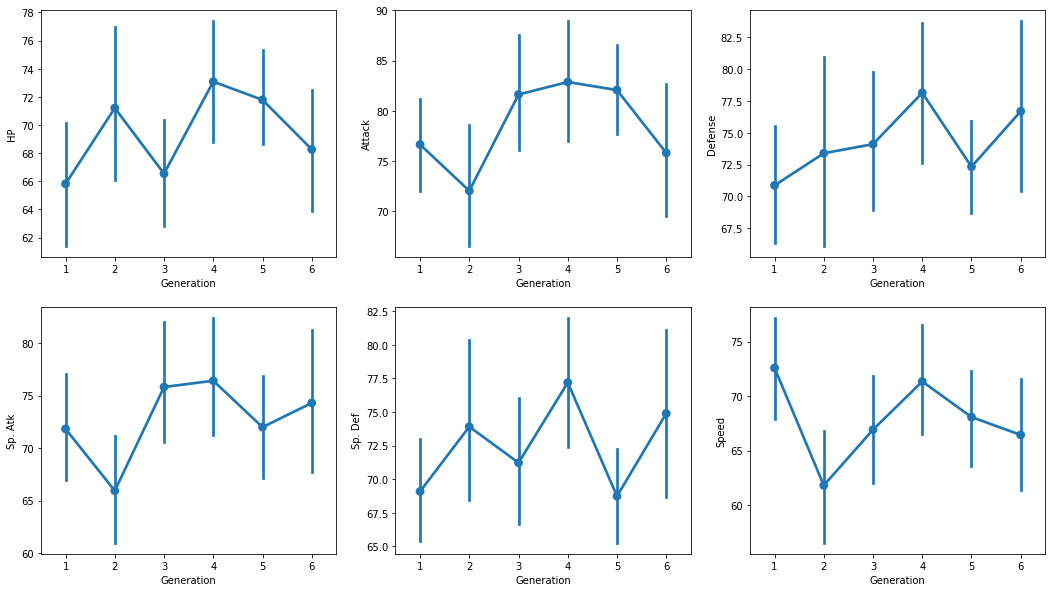

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
j = -1
for i in range(6):
    if i % 3 == 0:
        j = j + 1
    sns.pointplot(data=poke_df, x="Generation", y=stats[i], ax=axs[j, i % 3])
plt.show()

As we can see gen 4 is almost outclass every stat vs gen3. Gen1 being best at speed is interesting data btw

<a id="11"></a> <br>
### Best Pokemons by Stats

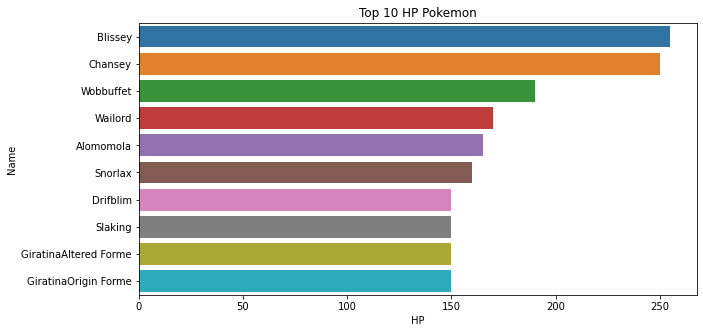

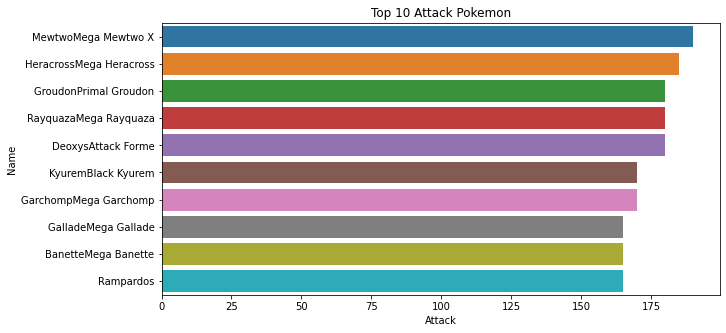

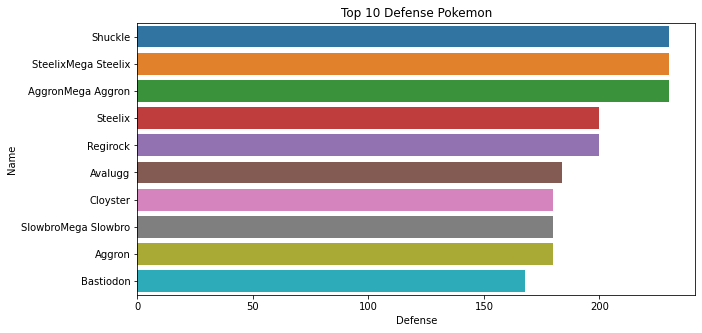

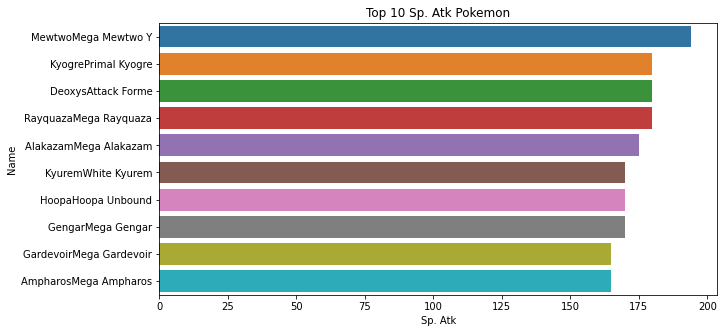

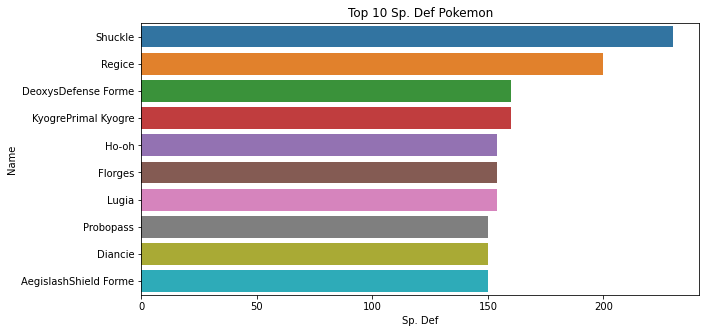

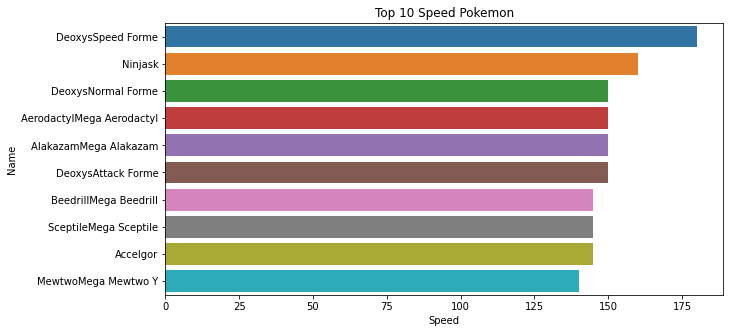

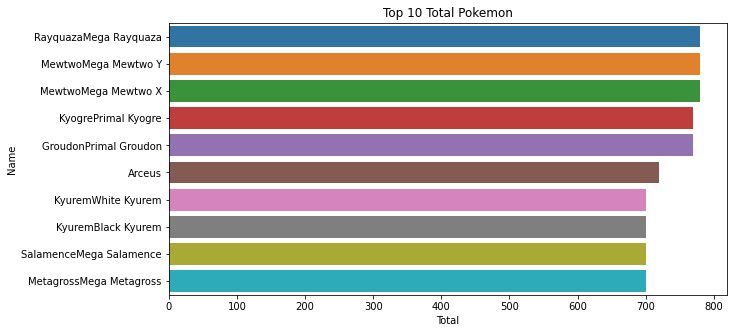

In [19]:
def top_stats(variable):
    stat_top10 = poke_df.sort_values(by=[variable], ascending=False).head(10)
    fig, axs = plt.subplots(figsize=(10,5))
    sns.barplot(data=stat_top10, x=variable, y="Name")
    plt.title("Top 10 "+variable+" Pokemon")
    plt.show()

for i in stats:
    top_stats(i)

<a id="12"></a> <br>
# 5. Legendary Pokemons
* Legendary vs Normal Pokemon stats
* Legendary Pokemon Counts by Generations
* Legendary Counts by types
* Is There Type With No Legendary Pokemon?

<a id="13"></a> <br>
### Legendary Vs Normal Pokemon Stats

<AxesSubplot:xlabel='Speed', ylabel='Density'>

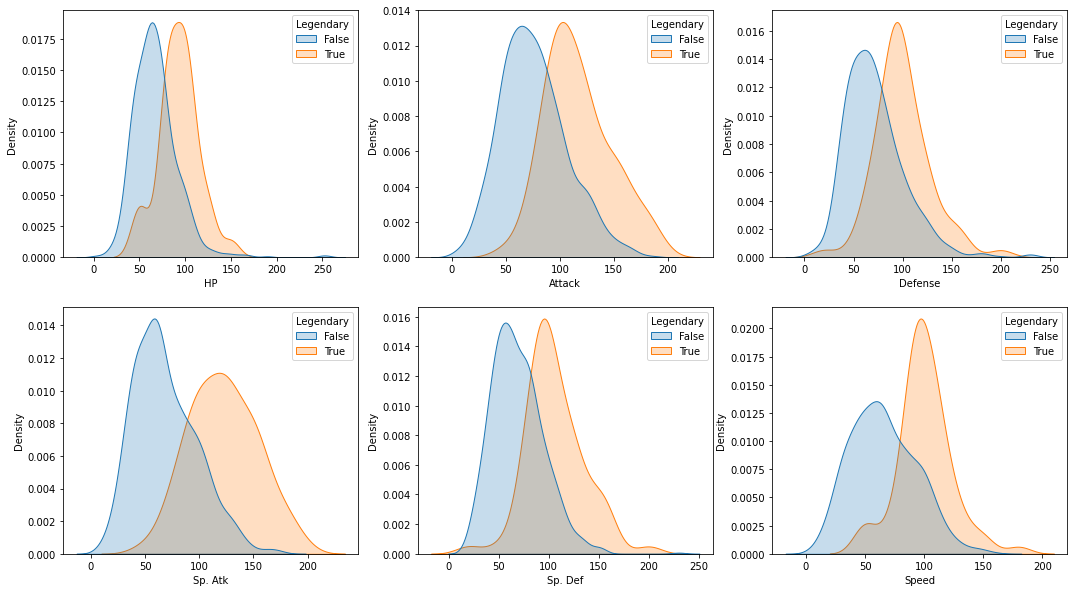

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.kdeplot(data=poke_df, x=stats[0], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 0])
sns.kdeplot(data=poke_df, x=stats[1], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 1])
sns.kdeplot(data=poke_df, x=stats[2], hue="Legendary", fill=True, common_norm=False, ax=axs[0, 2])
sns.kdeplot(data=poke_df, x=stats[3], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 0])
sns.kdeplot(data=poke_df, x=stats[4], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 1])
sns.kdeplot(data=poke_df, x=stats[5], hue="Legendary", fill=True, common_norm=False, ax=axs[1, 2])

<AxesSubplot:xlabel='Total', ylabel='Density'>

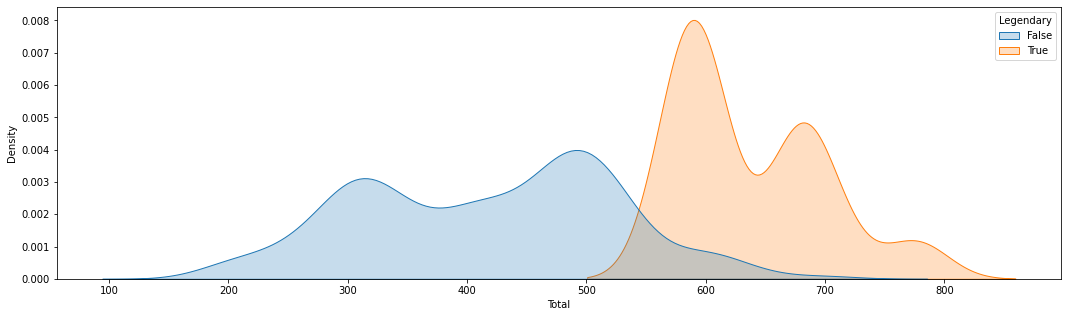

In [21]:
fig, axs = plt.subplots(figsize=(18, 5))
sns.kdeplot(data=poke_df, x="Total", hue="Legendary", fill=True, common_norm=False)

* New dataset for Legendary Pokemons

In [22]:
LegendaryPokemons = poke_df[poke_df["Legendary"] == True]

<a id="14"></a> <br>
### Legendary Pokemon counts by Generations

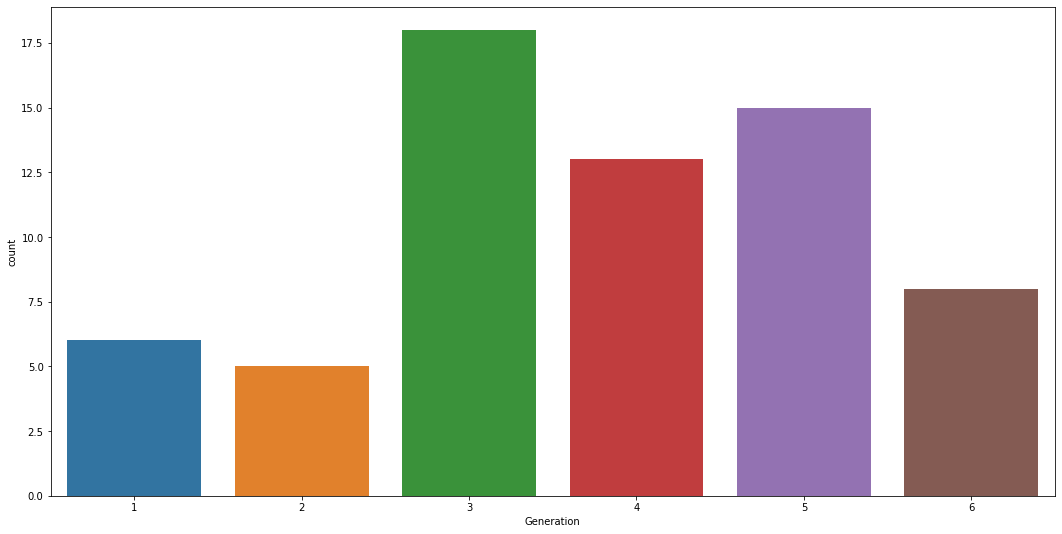

In [23]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='Generation', data=LegendaryPokemons)

<a id="15"></a> <br>
### Legendary Pokemon counts by Types

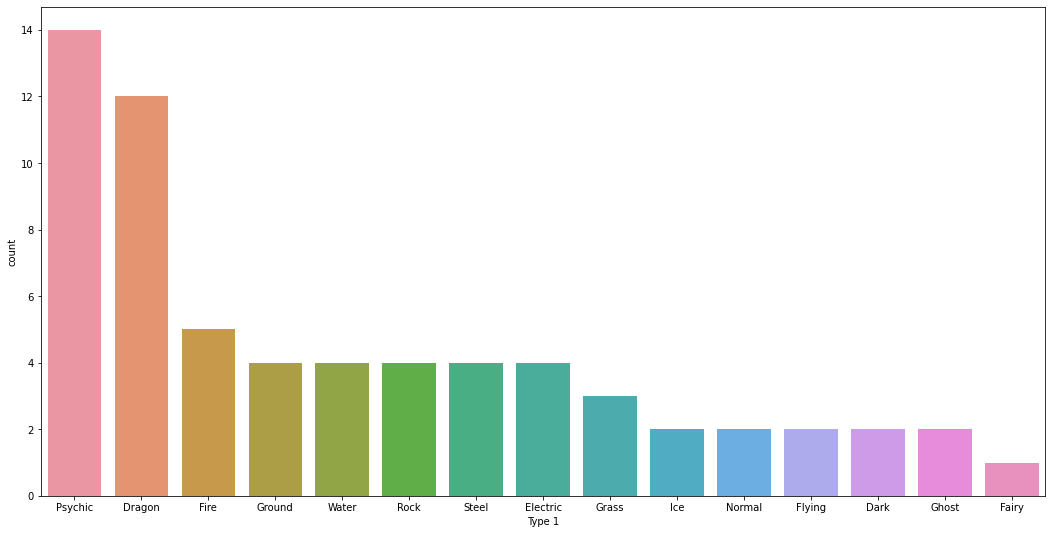

In [24]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='Type 1', data=LegendaryPokemons, order=LegendaryPokemons["Type 1"].value_counts().index)

<a id="16"></a> <br>
### Is There Type With No Legendary Pokemon?

In [25]:
test = poke_df.pivot_table(index='Type 1',
                                     columns='Legendary',
                                     values='Attack',
                                     fill_value=0,
                                     aggfunc='count').unstack()
print(test[True].to_string())

Type 1
Bug          0
Dark         2
Dragon      12
Electric     4
Fairy        1
Fighting     0
Fire         5
Flying       2
Ghost        2
Grass        3
Ground       4
Ice          2
Normal       2
Poison       0
Psychic     14
Rock         4
Steel        4
Water        4


As we can see there is no legendary pokemons as Bug,fighting and Poison type 

# #TODO: Creating Dream Pokemon Team